##  Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load Dataset 

In [2]:
book = pd.read_excel("Book1.xlsx")
book.head()

,title,author,summary,pages,rating,genres
0,The Glass Castle,Jeannette Walls,"A tender, moving tale of unconditional love in...",288,4.28,Biography
1,Angela's Ashes,Frank McCourt,Imbued on every page with Frank McCourt's asto...,452,4.12,Biography
2,Tuesdays with Morrie,Mitch Albom,"Maybe it was a grandparent, or a teacher or a ...",210,4.12,Biography
3,Running with Scissors,Augusten Burroughs,Running with Scissors is the true story of a b...,304,3.73,Biography
4,"A Child Called ""It""",Dave Pelzer,Also see: Alternate Cover Editions for this IS...,184,4.11,Biography


In [3]:
book.shape

(4750, 6)

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4750 non-null   object
 1   author   4750 non-null   object
 2   summary  4750 non-null   object
 3   pages    4750 non-null   object
 4   rating   4750 non-null   object
 5   genres   4750 non-null   object
dtypes: object(6)
memory usage: 222.8+ KB


In [5]:
book.describe()

,title,author,summary,pages,rating,genres
count,4750,4750,4750,4750,4750.00,4750
unique,4749,3053,4750,790,320.00,19
top,1984,Terry Pratchett,it is the story of four seekers who arrive at ...,288,4.05,Travel
freq,2,52,1,95,65.00,250


In [6]:
book['author'].value_counts()

Terry Pratchett        52
Janet Evanovich        24
Lee Child              20
Stephen King           20
William Shakespeare    18
                       ..
Daniel Quinn            1
Walt Gleeson            1
Suzy Kassem             1
M.T. Edvardsson         1
Alyson Noel             1
Name: author, Length: 3053, dtype: int64

# Exploratory Data Analysis 

###  1) checking for null values 

In [7]:
book.isnull().sum()

title      0
author     0
summary    0
pages      0
rating     0
genres     0
dtype: int64

###  Hence there are no null values in the dataset 

###   2) Checking for duplicate values 

In [8]:
book[book.duplicated()]

,title,author,summary,pages,rating,genres


###  There are 0 duplicate rows in the dataset so we don't need to drop the duplicated rows from the dataset 

###   3) checking genre distribution 

In [9]:
book['genres'].value_counts()

Travel             250
Sports             250
Thriller           250
Science Fiction    250
Business           250
Fantasy            250
Mystery            250
Romance            250
History            250
Classics           250
Cookbooks          250
Humor              250
Children           250
Philosophy         250
Nonfiction         250
Young Adult        250
Poetry             250
Biography          250
Fiction            250
Name: genres, dtype: int64

<AxesSubplot:xlabel='genres', ylabel='count'>

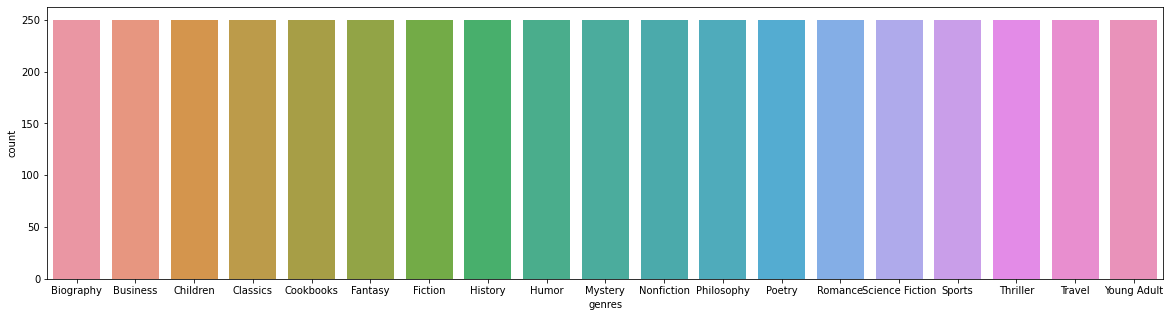

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(book['genres'])

###  Hence the dataset contain balanced genre distribution 

### 5) Top 10 authors

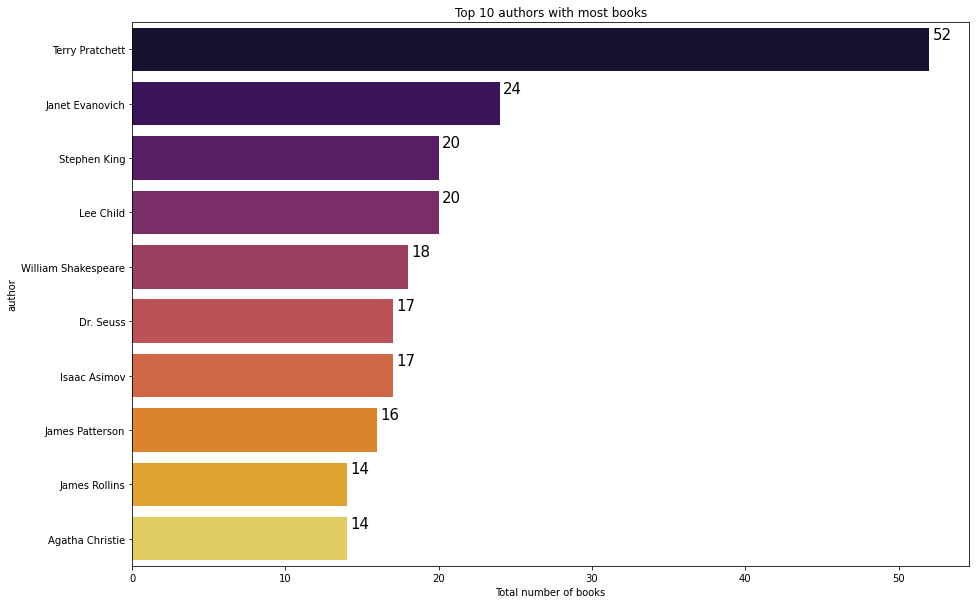

In [11]:
most_books = book.groupby('author')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#  Preprocessing 

In [12]:
import re
import string
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
doc = pd.DataFrame(book,columns=['title','author','summary'])
doc

,title,author,summary
0,The Glass Castle,Jeannette Walls,"A tender, moving tale of unconditional love in..."
1,Angela's Ashes,Frank McCourt,Imbued on every page with Frank McCourt's asto...
2,Tuesdays with Morrie,Mitch Albom,"Maybe it was a grandparent, or a teacher or a ..."
3,Running with Scissors,Augusten Burroughs,Running with Scissors is the true story of a b...
4,"A Child Called ""It""",Dave Pelzer,Also see: Alternate Cover Editions for this IS...
...,...,...,...
4745,Confessions of a Tween Superheroine,J.M. Guy,"IÃ¢â‚¬â„¢M JAZMIN SKYLYN GILLETTE, AND I HAVE ..."
4746,The Feds' Folly: Who Stole $17 Trillion?,Bill Brown,"In the sequel, The Feds' Folly, Who Stole $17 ..."
4747,Unwind,Neal Shusterman,"Connor, Risa, and Lev are running for their li..."
4748,Pretty Little Liars,Sara Shepard,EVERYONE HAS SOMETHING TO HIDE - ESPECIALLY HI...


In [14]:
doc.summary[0]

'A tender, moving tale of unconditional love in a family that, despite its profound flaws, gave the author the fiery determination to carve out a successful life on her own terms.Jeannette Walls grew up with parents whose ideals and stubborn nonconformity were both their curse and their salvation. Rex and Rose Mary Walls had four children. In the beginning, they lived like nomads, moving among Southwest desert towns, camping in the mountains. Rex was a charismatic, brilliant man who, when sober, captured his children\'s imagination, teaching them physics, geology, and above all, how to embrace life fearlessly. Rose Mary, who painted and wrote and couldn\'t stand the responsibility of providing for her family, called herself an "excitement addict." Cooking a meal that would be consumed in fifteen minutes had no appeal when she could make a painting that might last forever. Later, when the money ran out, or the romance of the wandering life faded, the Walls retreated to the dismal West V

###    Cleaning

In [15]:
def clean_text(text):
    text = text.lower()                                                        # lower case
    text = re.sub(r"\S*https?:\S*", " ", text)                                 # removing links
    text = re.sub('[^a-zA-Z]',' ', text) 
    text = re.sub('\[.*?\]', ' ', text)                                        # removing text in square brackets
    text = re.sub(r"[’…]", " ", text)                                          # removing special chracters
    text = re.sub("[0-9" "]+"," ",text)                                        # removing numbers
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))         # remove punctuations
    text_tokens = word_tokenize(text)                                          # Tokenization
    stop_words = stopwords.words('english')
    new_stop_words = ['even','find','want','make','u','one','take|']
    stop_words.extend(new_stop_words)
    stop_tokens = [word for word in text_tokens if not word in stop_words]     # Remove stop words
    stop_text = ' '.join(stop_tokens)
    lemmas = TextBlob(stop_text)         
    lemmas_token = [w.lemmatize() for w in lemmas.words]                       # Lemmatization
    lemmas_text = ' '.join(lemmas_token)  
    return lemmas_text
clean = lambda x: clean_text(x)

In [16]:
doc["SUMMARY"] = doc["summary"].apply(clean)
doc

,title,author,summary,SUMMARY
0,The Glass Castle,Jeannette Walls,"A tender, moving tale of unconditional love in...",tender moving tale unconditional love family d...
1,Angela's Ashes,Frank McCourt,Imbued on every page with Frank McCourt's asto...,imbued every page frank mccourt astounding hum...
2,Tuesdays with Morrie,Mitch Albom,"Maybe it was a grandparent, or a teacher or a ...",maybe grandparent teacher colleague someone ol...
3,Running with Scissors,Augusten Burroughs,Running with Scissors is the true story of a b...,running scissors true story boy whose mother p...
4,"A Child Called ""It""",Dave Pelzer,Also see: Alternate Cover Editions for this IS...,also see alternate cover edition isbn ace x ac...
...,...,...,...,...
4745,Confessions of a Tween Superheroine,J.M. Guy,"IÃ¢â‚¬â„¢M JAZMIN SKYLYN GILLETTE, AND I HAVE ...",jazmin skylyn gillette confession never really...
4746,The Feds' Folly: Who Stole $17 Trillion?,Bill Brown,"In the sequel, The Feds' Folly, Who Stole $17 ...",sequel fed folly stole trillion jones survivin...
4747,Unwind,Neal Shusterman,"Connor, Risa, and Lev are running for their li...",connor risa lev running life second civil war ...
4748,Pretty Little Liars,Sara Shepard,EVERYONE HAS SOMETHING TO HIDE - ESPECIALLY HI...,everyone something hide especially high school...


In [17]:
doc.SUMMARY[0]

'tender moving tale unconditional love family despite profound flaw gave author fiery determination carve successful life term jeannette wall grew parent whose ideal stubborn nonconformity curse salvation rex rose mary wall four child beginning lived like nomad moving among southwest desert town camping mountain rex charismatic brilliant man sober captured child imagination teaching physic geology embrace life fearlessly rose mary painted wrote stand responsibility providing family called excitement addict cooking meal would consumed fifteen minute appeal could painting might last forever later money ran romance wandering life faded wall retreated dismal west virginia mining town family rex wall done everything could escape drank stole grocery money disappeared day dysfunction family escalated jeannette brother sister fend supporting another weathered parent betrayal finally found resource leave home astonishing jeannette wall gut tenacity intelligence get describes parent deep affecti

In [18]:
doc.SUMMARY[2465]

'though small town heart lawrenceton georgia dark side crime buff librarian aurora roe teagarden member real murder club meet month analyze famous case harmless pastime night find member killed manner eerily resembles crime club discus brutal copycat killing follow roe uncover person behind terrifying game cast member real murder included prime suspect potential victim'

In [19]:
text = ','.join(doc["SUMMARY"])
text

'tender moving tale unconditional love family despite profound flaw gave author fiery determination carve successful life term jeannette wall grew parent whose ideal stubborn nonconformity curse salvation rex rose mary wall four child beginning lived like nomad moving among southwest desert town camping mountain rex charismatic brilliant man sober captured child imagination teaching physic geology embrace life fearlessly rose mary painted wrote stand responsibility providing family called excitement addict cooking meal would consumed fifteen minute appeal could painting might last forever later money ran romance wandering life faded wall retreated dismal west virginia mining town family rex wall done everything could escape drank stole grocery money disappeared day dysfunction family escalated jeannette brother sister fend supporting another weathered parent betrayal finally found resource leave home astonishing jeannette wall gut tenacity intelligence get describes parent deep affecti

### Freq. of Words, Custom Stop Word Removal & Word Cloud

In [20]:
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS

In [21]:
#making a corpus of the dataset
review_str = ' '.join(doc.SUMMARY.tolist())

In [22]:
text = review_str
words = text.split()
fdsit1 = FreqDist(words)
print(fdsit1)
print(fdsit1.most_common(100))

#Words which are not in inbuilt stopwords are noted

<FreqDist with 38261 samples and 448210 outcomes>
[('life', 2947), ('world', 2374), ('book', 2347), ('new', 2331), ('story', 2007), ('time', 1972), ('year', 1852), ('first', 1547), ('love', 1323), ('way', 1113), ('man', 1030), ('work', 1008), ('people', 1002), ('family', 979), ('two', 952), ('like', 949), ('woman', 891), ('take', 880), ('history', 869), ('day', 859), ('american', 830), ('novel', 815), ('know', 798), ('author', 791), ('best', 786), ('war', 780), ('also', 775), ('ever', 767), ('come', 759), ('never', 753), ('young', 739), ('home', 730), ('secret', 727), ('would', 723), ('every', 720), ('friend', 719), ('business', 696), ('child', 687), ('reader', 685), ('old', 683), ('must', 683), ('u', 682), ('great', 678), ('back', 674), ('could', 640), ('get', 639), ('human', 636), ('many', 616), ('recipe', 616), ('death', 610), ('well', 609), ('long', 592), ('thing', 575), ('power', 563), ('heart', 555), ('place', 553), ('york', 549), ('edition', 548), ('classic', 547), ('set', 544),

### WordCloud

In [23]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

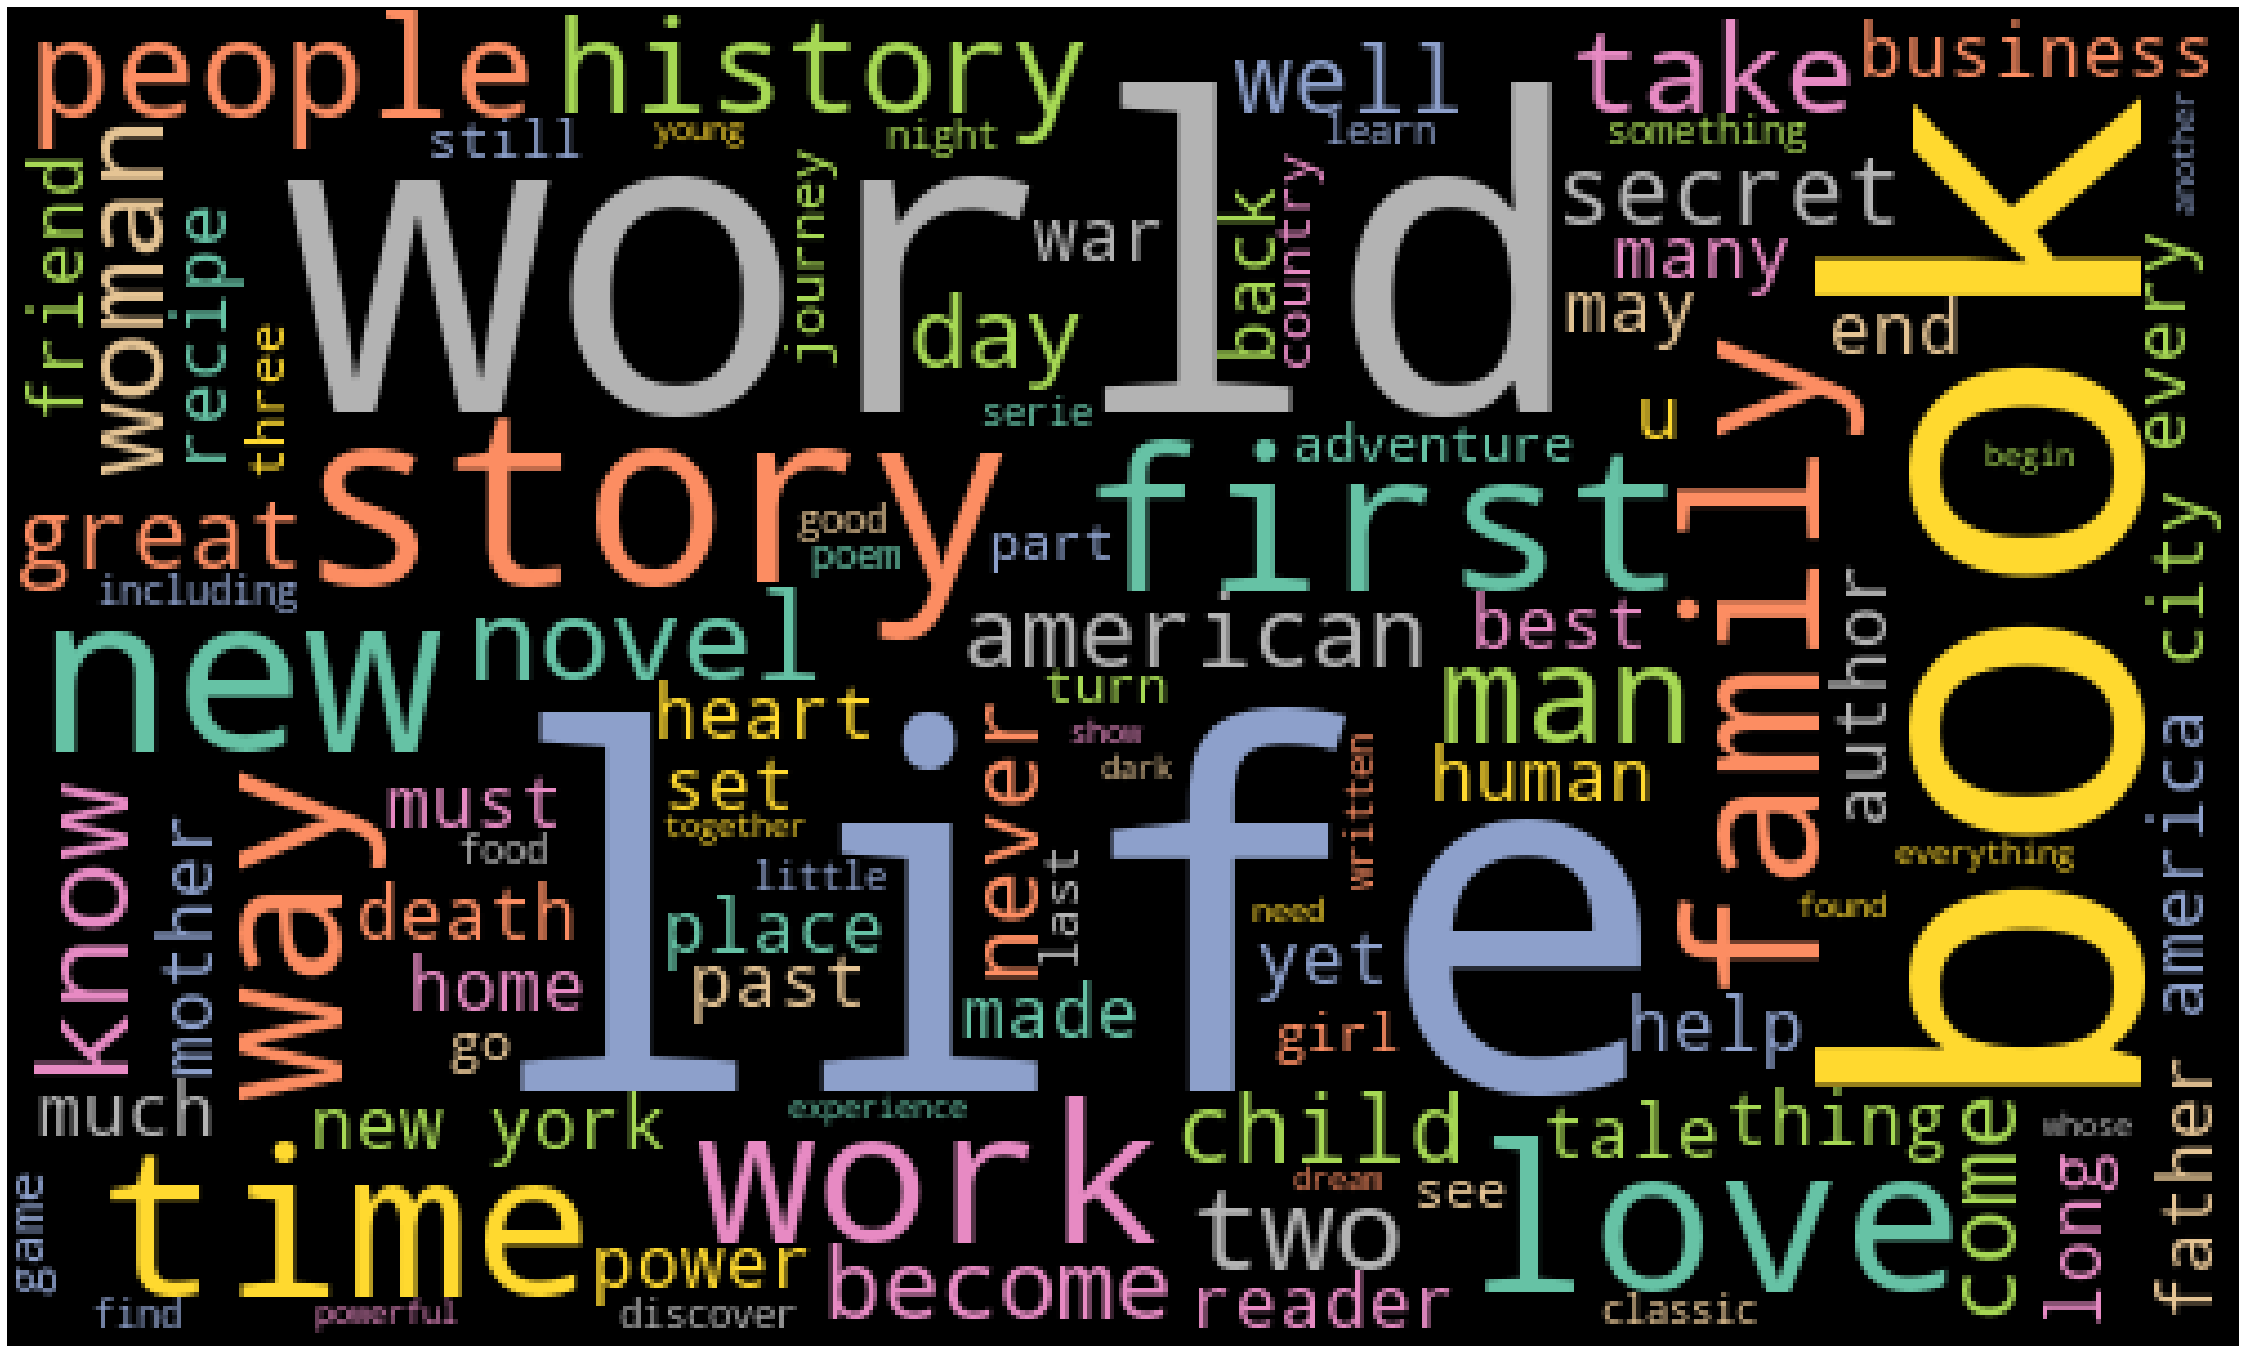

In [24]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(review_str)
plot_cloud(wordcloud)

In [25]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("custom_stopwords.txt","r") as stop:
    custom_stop = set(stop.read().split("\n"))

In [26]:
# We can create a new stopwords list by mergeing WordCLoud's STOPWORDS and our custom_stop
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

235

In [27]:
doc.SUMMARY = doc.SUMMARY.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
doc.SUMMARY

0       tender moving tale unconditional love family d...
1       imbued page frank mccourt astounding humor com...
2       maybe grandparent teacher colleague someone ol...
3       running scissors true story boy mother poet de...
4       alternate cover edition isbn ace x ace x chron...
                              ...                        
4745    jazmin skylyn gillette confession really plann...
4746    sequel fed folly stole trillion jones survivin...
4747    connor risa lev running life second civil war ...
4748    everyone something hide especially high school...
4749    todd hewitt boy town men settler infected nois...
Name: SUMMARY, Length: 4750, dtype: object

In [28]:
#making a corpus of the dataset after custom stop word removal
review_str_2 = ' '.join(doc.SUMMARY.tolist())

In [29]:
#Checking Freq Distribution for new corpus
text = review_str_2
words = text.split()
fdsit2 = FreqDist(words)
print(fdsit2)
print(fdsit2.most_common(100))

<FreqDist with 38181 samples and 415886 outcomes>
[('life', 2947), ('world', 2374), ('story', 2007), ('time', 1972), ('year', 1852), ('love', 1323), ('man', 1030), ('work', 1008), ('people', 1002), ('family', 979), ('woman', 891), ('history', 869), ('day', 859), ('american', 830), ('novel', 815), ('author', 791), ('best', 786), ('war', 780), ('young', 739), ('home', 730), ('secret', 727), ('friend', 719), ('business', 696), ('child', 687), ('reader', 685), ('old', 683), ('back', 674), ('human', 636), ('recipe', 616), ('death', 610), ('long', 592), ('power', 563), ('heart', 555), ('place', 553), ('york', 549), ('edition', 548), ('classic', 547), ('set', 544), ('city', 543), ('century', 530), ('father', 521), ('past', 520), ('tale', 515), ('become', 507), ('america', 500), ('good', 496), ('little', 490), ('girl', 486), ('journey', 478), ('end', 470), ('mother', 467), ('game', 460), ('series', 460), ('men', 458), ('night', 452), ('food', 447), ('tell', 444), ('adventure', 444), ('turn', 4

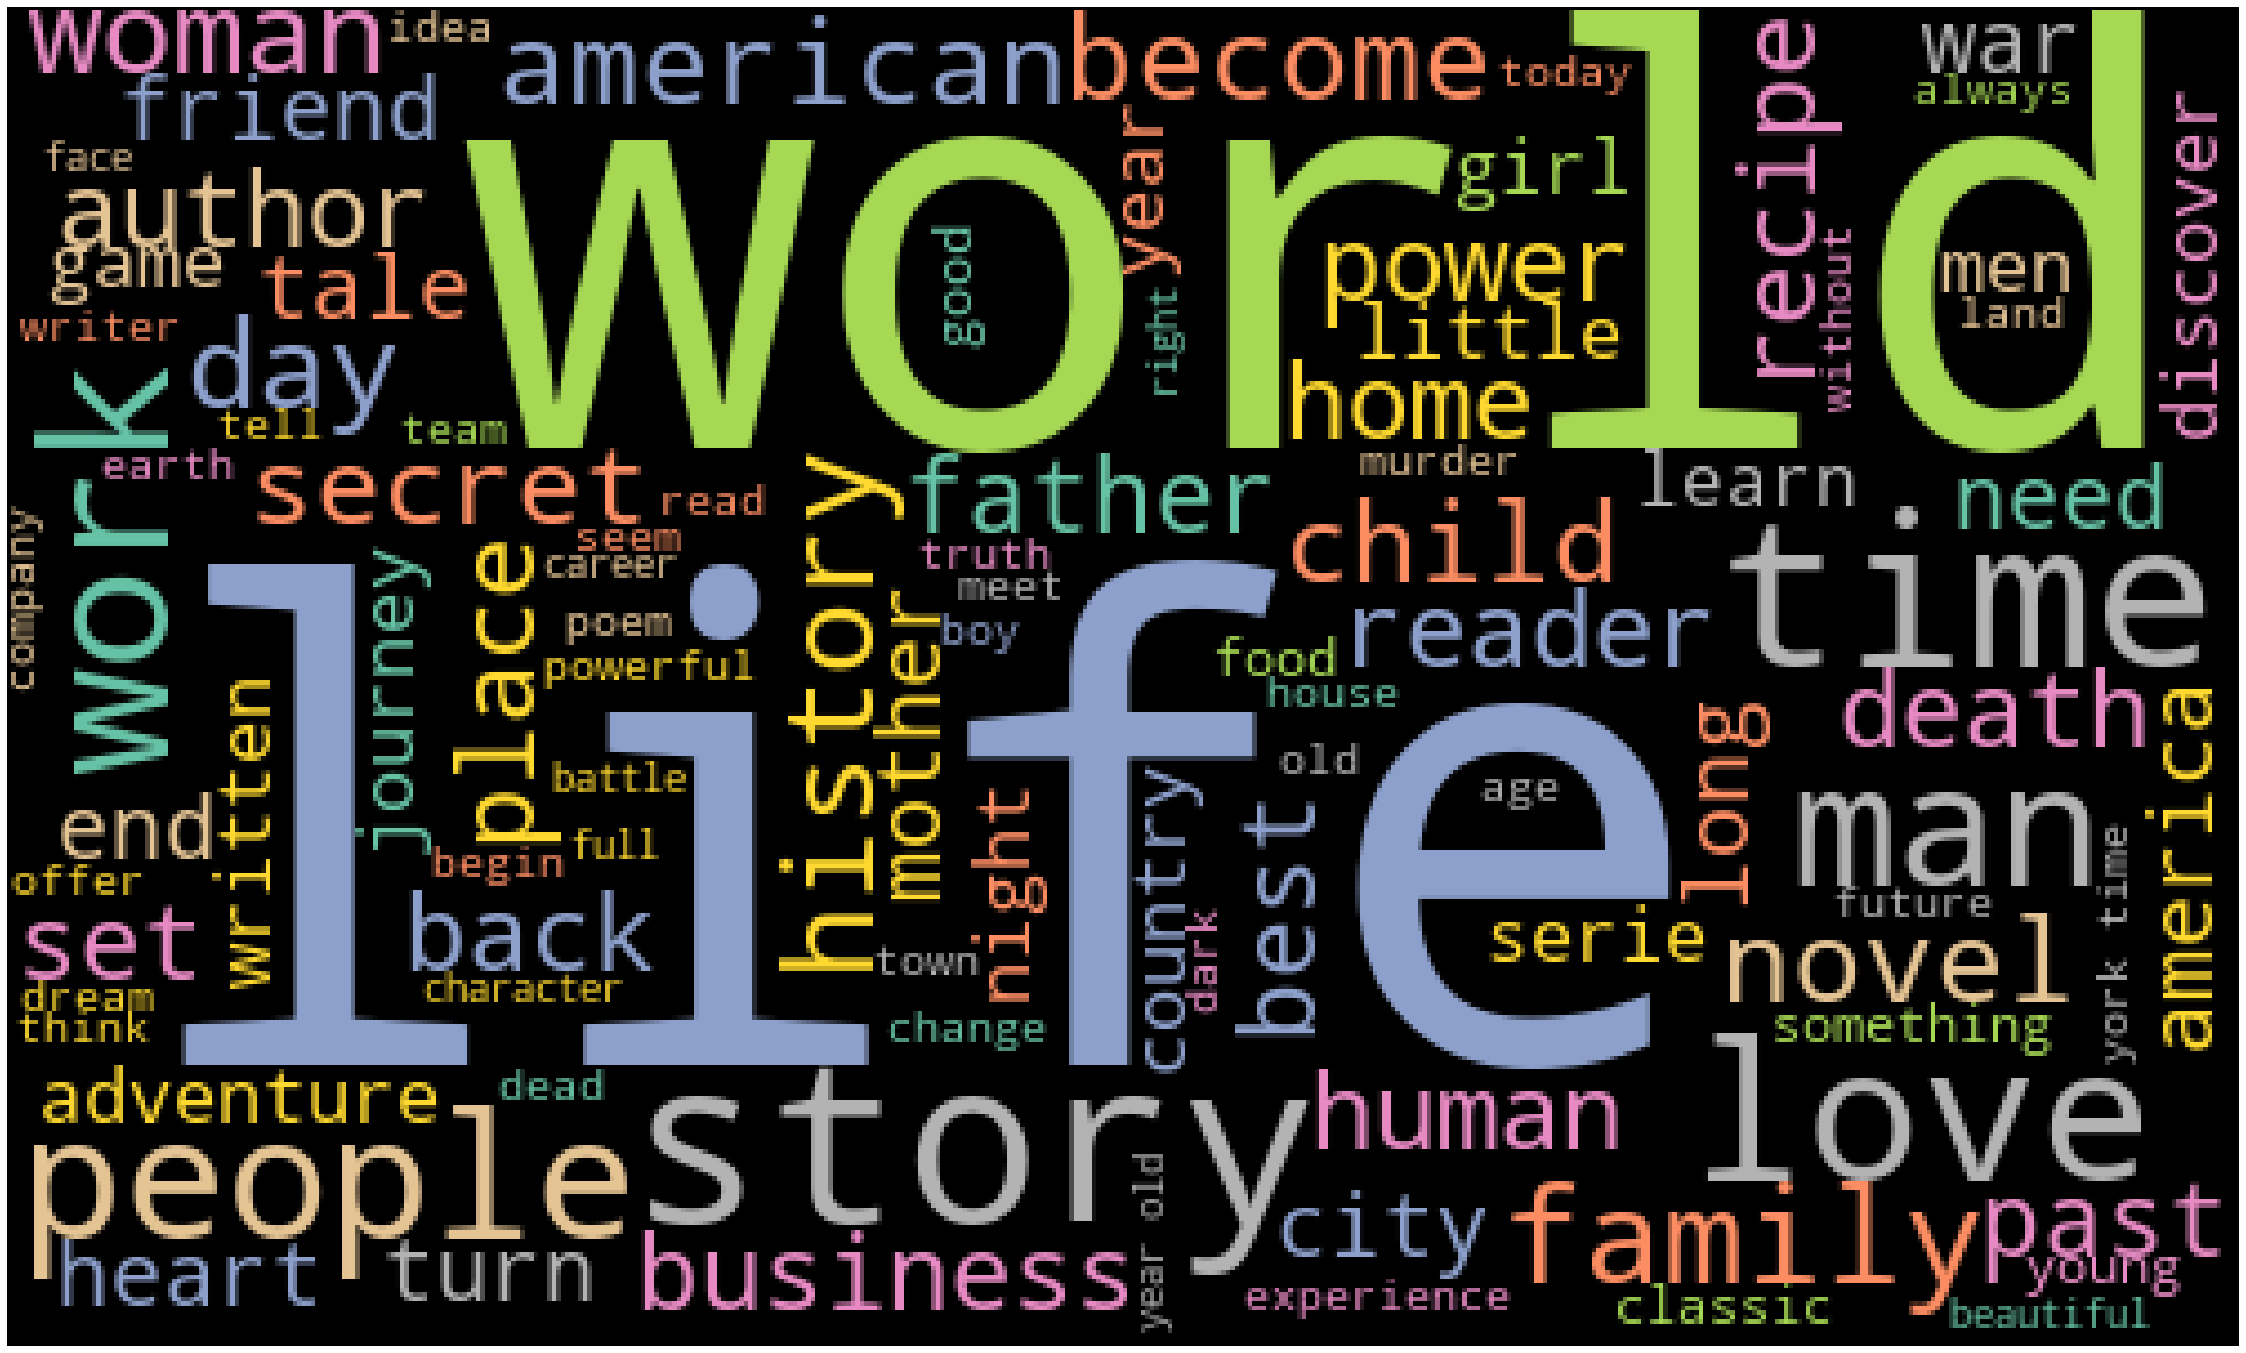

In [30]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(review_str_2)
plot_cloud(wordcloud)

In [31]:
doc.SUMMARY

0       tender moving tale unconditional love family d...
1       imbued page frank mccourt astounding humor com...
2       maybe grandparent teacher colleague someone ol...
3       running scissors true story boy mother poet de...
4       alternate cover edition isbn ace x ace x chron...
                              ...                        
4745    jazmin skylyn gillette confession really plann...
4746    sequel fed folly stole trillion jones survivin...
4747    connor risa lev running life second civil war ...
4748    everyone something hide especially high school...
4749    todd hewitt boy town men settler infected nois...
Name: SUMMARY, Length: 4750, dtype: object

###    N-Gram 

###   a) Unigram

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
def get_unigrams(corpus, n=None):
    cv_uni = CountVectorizer(ngram_range=(1,1), max_features=5000).fit(corpus)
    bag_words = cv_uni.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_uni.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [34]:
top_words = get_unigrams(doc["SUMMARY"], n=150) 
top_150 = pd.DataFrame(top_words)
top_150.columns=["Unigram", "Freq"]

[Text(0, 0, 'life'),
 Text(1, 0, 'world'),
 Text(2, 0, 'story'),
 Text(3, 0, 'time'),
 Text(4, 0, 'year'),
 Text(5, 0, 'love'),
 Text(6, 0, 'man'),
 Text(7, 0, 'work'),
 Text(8, 0, 'people'),
 Text(9, 0, 'family'),
 Text(10, 0, 'woman'),
 Text(11, 0, 'history'),
 Text(12, 0, 'day'),
 Text(13, 0, 'american'),
 Text(14, 0, 'novel'),
 Text(15, 0, 'author'),
 Text(16, 0, 'best'),
 Text(17, 0, 'war'),
 Text(18, 0, 'young'),
 Text(19, 0, 'home')]

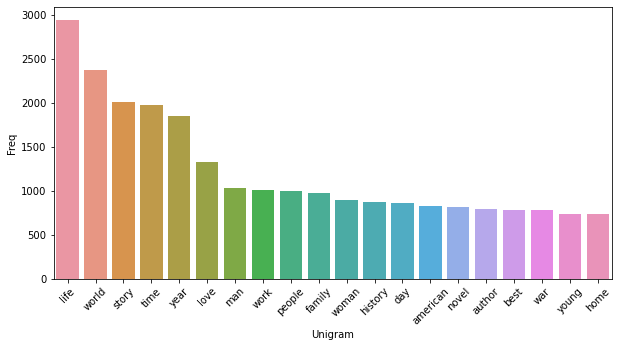

In [35]:
top_uni = top_150.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_uni["Unigram"],y=top_uni["Freq"])
plot.set_xticklabels(rotation=45,labels = top_uni["Unigram"])

###   b) Bigram

In [36]:
def get_Bigrams(corpus, n=None):
    cv_bi= CountVectorizer(ngram_range=(2,2), max_features=5000).fit(corpus)
    bag_words = cv_bi.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_bi.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [37]:
top_words = get_Bigrams(doc["SUMMARY"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'york time'),
 Text(1, 0, 'year old'),
 Text(2, 0, 'bestselling author'),
 Text(3, 0, 'year ago'),
 Text(4, 0, 'award winning'),
 Text(5, 0, 'best friend'),
 Text(6, 0, 'united state'),
 Text(7, 0, 'world war'),
 Text(8, 0, 'time bestselling'),
 Text(9, 0, 'tell story'),
 Text(10, 0, 'alternate cover'),
 Text(11, 0, 'cover edition'),
 Text(12, 0, 'year later'),
 Text(13, 0, 'young woman'),
 Text(14, 0, 'high school'),
 Text(15, 0, 'twentieth century'),
 Text(16, 0, 'five year'),
 Text(17, 0, 'around world'),
 Text(18, 0, 'york city'),
 Text(19, 0, 'science fiction')]

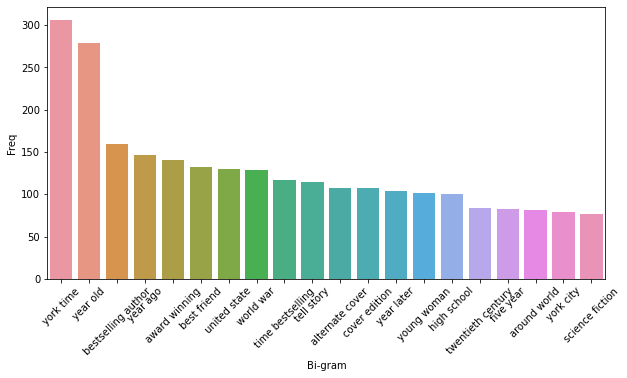

In [38]:
top_bi = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_bi["Bi-gram"],y=top_bi["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bi["Bi-gram"])

###   c) Trigram 

In [39]:
def get_Trigrams(corpus, n=None):
    cv_tri = CountVectorizer(ngram_range=(3,3), max_features=5000).fit(corpus)
    bag_words = cv_tri.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_tri.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [40]:
top_words = get_Trigrams(doc["SUMMARY"], n=250) 
top_250 = pd.DataFrame(top_words)
top_250.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'york time bestselling'),
 Text(1, 0, 'alternate cover edition'),
 Text(2, 0, 'time bestselling author'),
 Text(3, 0, 'york time bestseller'),
 Text(4, 0, 'world war ii'),
 Text(5, 0, 'cover edition isbn'),
 Text(6, 0, 'librarian note alternate'),
 Text(7, 0, 'note alternate cover'),
 Text(8, 0, 'twenty five year'),
 Text(9, 0, 'sixteen year old'),
 Text(10, 0, 'pulitzer prize winning'),
 Text(11, 0, 'seventeen year old'),
 Text(12, 0, 'york time review'),
 Text(13, 0, 'award winning author'),
 Text(14, 0, 'wall street journal'),
 Text(15, 0, 'five year ago'),
 Text(16, 0, 'best selling author'),
 Text(17, 0, 'york time best'),
 Text(18, 0, 'alternate cover isbn'),
 Text(19, 0, 'twelve year old')]

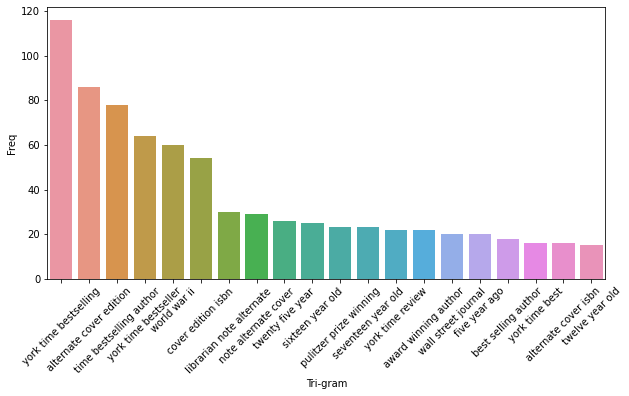

In [41]:
top_tri = top_250.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_tri["Tri-gram"],y=top_tri["Freq"])
plot.set_xticklabels(rotation=45,labels = top_tri["Tri-gram"])

###    Copying dataset to csv 

In [42]:
doc['pages'] = book.pages
doc['rating'] = book.rating
doc['genres'] = book.genres

In [43]:
doc

,title,author,summary,SUMMARY,pages,rating,genres
0,The Glass Castle,Jeannette Walls,"A tender, moving tale of unconditional love in...",tender moving tale unconditional love family d...,288,4.28,Biography
1,Angela's Ashes,Frank McCourt,Imbued on every page with Frank McCourt's asto...,imbued page frank mccourt astounding humor com...,452,4.12,Biography
2,Tuesdays with Morrie,Mitch Albom,"Maybe it was a grandparent, or a teacher or a ...",maybe grandparent teacher colleague someone ol...,210,4.12,Biography
3,Running with Scissors,Augusten Burroughs,Running with Scissors is the true story of a b...,running scissors true story boy mother poet de...,304,3.73,Biography
4,"A Child Called ""It""",Dave Pelzer,Also see: Alternate Cover Editions for this IS...,alternate cover edition isbn ace x ace x chron...,184,4.11,Biography
...,...,...,...,...,...,...,...
4745,Confessions of a Tween Superheroine,J.M. Guy,"IÃ¢â‚¬â„¢M JAZMIN SKYLYN GILLETTE, AND I HAVE ...",jazmin skylyn gillette confession really plann...,187,_x000D_\n 4.15_x000D_\n,Young Adult
4746,The Feds' Folly: Who Stole $17 Trillion?,Bill Brown,"In the sequel, The Feds' Folly, Who Stole $17 ...",sequel fed folly stole trillion jones survivin...,262,_x000D_\n 4.20_x000D_\n,Young Adult
4747,Unwind,Neal Shusterman,"Connor, Risa, and Lev are running for their li...",connor risa lev running life second civil war ...,337,_x000D_\n 4.15_x000D_\n,Young Adult
4748,Pretty Little Liars,Sara Shepard,EVERYONE HAS SOMETHING TO HIDE - ESPECIALLY HI...,everyone something hide especially high school...,286,_x000D_\n 3.86_x000D_\n,Young Adult


### word count for description of book 

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions before cleaning'}, ylabel='Frequency'>

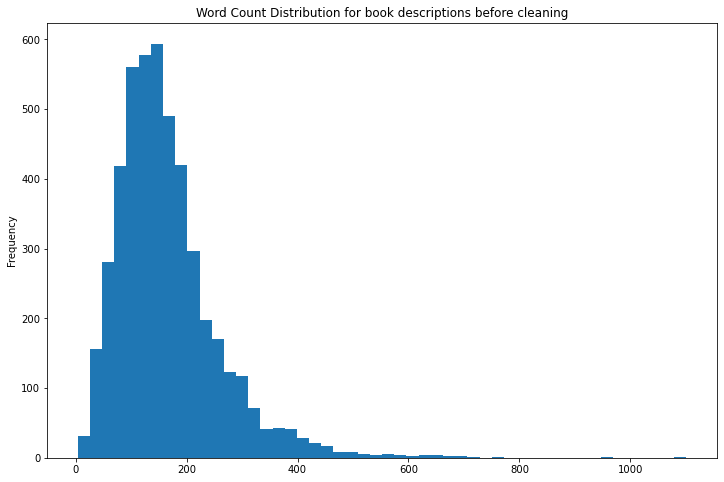

In [44]:
doc['word_count'] = doc['summary'].apply(lambda x: len(str(x).split()))
doc['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions before cleaning')

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions after cleaning'}, ylabel='Frequency'>

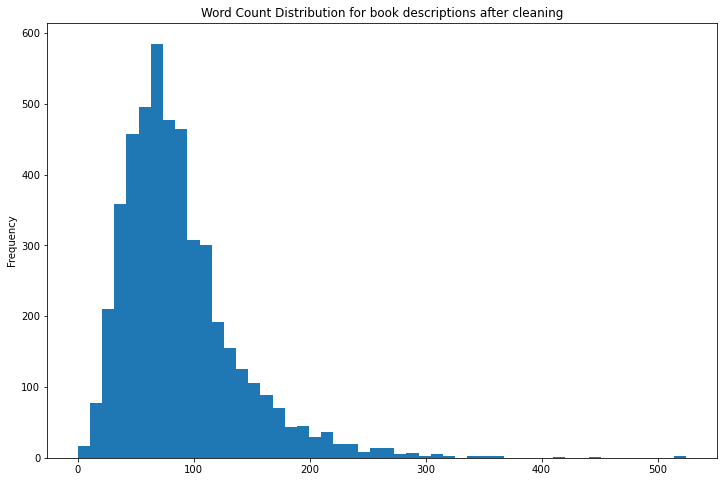

In [45]:
doc['word_count'] = doc['SUMMARY'].apply(lambda x: len(str(x).split()))# Plotting the word count
doc['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions after cleaning')

In [46]:
new_book = doc.drop(['summary','word_count'],axis=1)
new_book

,title,author,SUMMARY,pages,rating,genres
0,The Glass Castle,Jeannette Walls,tender moving tale unconditional love family d...,288,4.28,Biography
1,Angela's Ashes,Frank McCourt,imbued page frank mccourt astounding humor com...,452,4.12,Biography
2,Tuesdays with Morrie,Mitch Albom,maybe grandparent teacher colleague someone ol...,210,4.12,Biography
3,Running with Scissors,Augusten Burroughs,running scissors true story boy mother poet de...,304,3.73,Biography
4,"A Child Called ""It""",Dave Pelzer,alternate cover edition isbn ace x ace x chron...,184,4.11,Biography
...,...,...,...,...,...,...
4745,Confessions of a Tween Superheroine,J.M. Guy,jazmin skylyn gillette confession really plann...,187,_x000D_\n 4.15_x000D_\n,Young Adult
4746,The Feds' Folly: Who Stole $17 Trillion?,Bill Brown,sequel fed folly stole trillion jones survivin...,262,_x000D_\n 4.20_x000D_\n,Young Adult
4747,Unwind,Neal Shusterman,connor risa lev running life second civil war ...,337,_x000D_\n 4.15_x000D_\n,Young Adult
4748,Pretty Little Liars,Sara Shepard,everyone something hide especially high school...,286,_x000D_\n 3.86_x000D_\n,Young Adult


In [ ]:
new_book.to_csv('new_book.csv',index=False)